# KMeans Clustering

## Prerequisites


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

In [2]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")
master_df = pd.read_pickle("../data/processed/master_df.pkl")

In [3]:
selected_features = [
    "naics1_occ1",
    "naics1_occ2",
    "naics1_occ3",
    "naics1_occ4",
    "naics1_occ5",
    "naics2-5_occ1-3",
    "naics2-5_occ4-5",
    "naics1_est",
    "naics2-5_est",
    "naics1_ap",
    "naics2-5_ap",
    "newest_gdp",
]
result_df = master_df_scaled[selected_features]

## Clustering


#### Identifying Optimum Number of Clusters


In [4]:
def optimise_kmeans(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

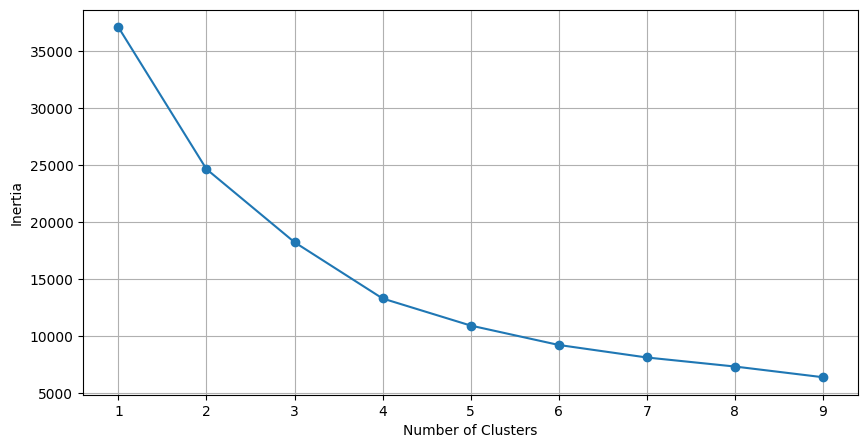

In [5]:
optimise_kmeans(result_df, 10)

In [11]:
number_of_clusters = 4

#### Applying KMeans to our data


In [12]:
kmeans = KMeans(
    n_clusters=number_of_clusters, init="k-means++", max_iter=300, n_init=10
)

kmeans.fit(result_df)

result_df["Cluster_ID"] = kmeans.labels_

### Analyse Clusters


In [13]:
print(result_df["Cluster_ID"].value_counts())

Cluster_ID
0    2888
3     184
1      15
2       2
Name: count, dtype: int64


<Axes: xlabel='Cluster_ID'>

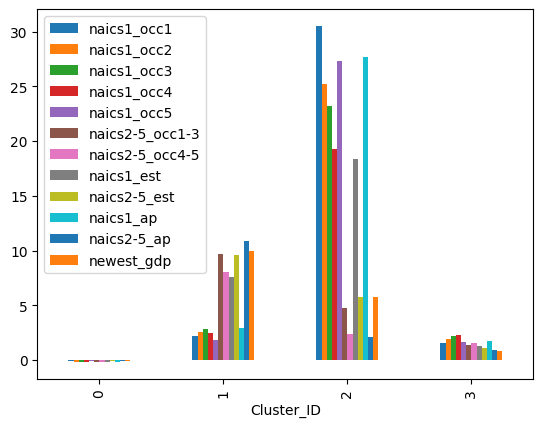

In [14]:
result_df.groupby("Cluster_ID")[selected_features].mean().plot(legend=True, kind="bar")

In [43]:
print(result_df[result_df["Cluster_ID"] == 1])

       naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-3  naics2-5_occ4-5  naics1_est  naics2-5_est  naics1_ap  naics2-5_ap  mean_gdp  Cluster_ID
FIPS                                                                                                                                                                            
6037         16.01        16.72        13.91         6.82        15.15            10.64             4.79       37.29         27.03      24.93        13.99     19.78           1
9003         11.41         5.03        10.78        25.96        17.23             0.61             1.55       12.26          2.62      14.63         1.77      4.15           1
20173        27.67        26.27        22.49         4.88        15.13             3.17             0.71       14.69          1.14      12.34         1.50      3.23           1
29189        16.34        16.72        17.66        28.98        15.42             3.34             3.07        1.2

In [44]:
print(result_df[result_df["Cluster_ID"] == 3])

       naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-3  naics2-5_occ4-5  naics1_est  naics2-5_est  naics1_ap  naics2-5_ap  mean_gdp  Cluster_ID
FIPS                                                                                                                                                                            
4013          6.65         7.08         6.31         4.70        11.64             7.25             5.32       14.42         11.85       6.45         7.00      8.92           3
6059          3.53         3.67         3.05         1.51         3.24             5.11             2.32       15.22         12.74       3.89         7.26     12.30           3
6073          7.47         7.76         6.43         3.28         6.95             3.27             1.39        7.69          6.89      10.15         4.38      9.34           3
6085          2.54         2.65         2.20         1.15         2.32             1.55             0.35        2.3

### Export


In [15]:
pd.to_pickle(result_df, "../data/processed/result_kmeans_df.pkl")